# NLP(Natural Language Processing) 기초

## word embedding

### sparse representation

- ['빨강', '빨강', '파랑']
  - binary
    ```
    [0, 0, 1]
    ```
  - one-hot encoding 
    ```
    [
      [1, 0]
      [1, 0]
      [0. 1]
    ]
    ```
 



In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
import numpy as np
from keras.utils import to_categorical
# define example

# list 생성
data = ['빨강', '파랑', '노랑', '초록', '노랑', '파랑', '초록', '빨강', '초록', '빨강']
print(data)

# 생성한 list를 인자로 data Array 생성
data = np.array(data)





['빨강', '파랑', '노랑', '초록', '노랑', '파랑', '초록', '빨강', '초록', '빨강']


In [13]:
# string to index label

# LabelEncoder : 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능
label_encoder = LabelEncoder()

# 앞에서 생성한 data Array를 이용해 data를 피팅하고, 라벨 숫자로 변환
# vec = label_encoder.fit_transform(data) -> 이렇게도 표기 가능
label_encoder.fit(data)
vec = label_encoder.transform(data)

# 노랑 : 0, 빨강 : 1, 초록 : 2, 파랑 : 3
print(vec)

[1 3 0 2 0 3 2 1 2 1]


In [29]:
# print label classes
# 인코더에 등록된 클래스 출력
# 자음 순서로 매칭되는 듯
print(label_encoder.classes_)

['노랑' '빨강' '초록' '파랑']


In [21]:
# index를 원래 값(문자)로 변환할 경우
# transform : 문자 -> 숫자
# inverse_transform : 숫자 -> 문자

label_encoder.inverse_transform([1])

array(['빨강'], dtype='<U2')

  * one hot encoding
    - binary encode의 경우, data 간에 관계가 없음에도 잘못된 관계를 형성할 수 있음

In [17]:
# one hot encode
# 고유 값의 개수만큼 columns 생성, 한 개의 coiumns에만 True, 나머지는 False를 넣어 독립적인 관계를 표현
# Keras에서 지원하는 to_categorical 함수를 사용해 One-hot encoding 가능
encoded = to_categorical(vec)
print(encoded)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [31]:
# invert encoding

# argmax : numpy의 함수로, array 요소 중 최댓값의 index 반환
# argmax, argmin(최솟값) 함수는 자주 사용하니 기억해두기!

# 아래의 코드에서는 encoded의 2번째 행 중에서 최댓값 반환
# inverted는 encoded의 2번째 행에서 4번째 요소, 파랑의 값을 갖게 됨
inverted = argmax(encoded[1])
print(inverted)

# invert 값을 갖는 고유 값(문자)로 변환
inverted_string = label_encoder.inverse_transform([inverted])
print(inverted_string)

3
['파랑']


#### 단점
- class가 많아지면 표현하기위해서 0이 많아져 데이터 양이 많아지고
- 실제 의미있는 데이터는 적어진다.(대량의 0, 그중에 하나만 1)
- 단어의 종류가 10,000 개라면 10,000 column 의 array
- 단어의 종류가 100,000 개라면 100,000 column의 array 
- -->sparse representation

### dense *representation*

In [27]:
# define training data
# 2차원 list 생성
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

  * [Word2Vec](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/03/30/word2vec/) : 구글에서 개발한 방법론으로, 단어(Word)를 벡터(Vector)로 변환

In [28]:
from gensim.models import Word2Vec

In [29]:
# contents를 100차원의 벡터로 변환
# 출현 빈도가 1번 미만인 단어의 경우, 분석에서 제외
# 파라미터 sg가 0일 때는 CBOW 방법, 1일 때는 Skip-gram 방법
# sg의 default 값은 0이므로, CBOW 방법을 사용
model = Word2Vec(sentences, min_count=1, size=100)

In [55]:
# summarize the loaded model
# alpha : 학습률 (≒ 학습 속도, 학습할 때 가중치에 대해 얼마나 많은 변화를 주는 지에 대한 상수)
        # 학습률과 학습 속도가 비례하기 때문에, 학습 속도라고 이해해도 무방
print(model)
model

Word2Vec(vocab=14, size=100, alpha=0.025)


In [77]:
# summarize vocabulary
# wv : 모델 생성 후, 사용 가능한 듯(?)

# 생성한 모델의 단어로 list 생성
words = list(model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

- model['sentence'] : 해당 코드를 실행하면 __getitem__ 만 사용하지 말고, wv와 함께 사용하라는 문구가 출력
- __getitem__ : tuple, dictionary 등, 객체 형태의 자료구조에서 특정 값만을 추출하고 싶을 때 사용
- dictionary에서 특정 key의 value 값을 추출할 때, dictionary["key"]의 형식을 사용
- 이때 __getitem__를 써야하나, Override 되어있기 때문에 사용할 필요가 없음
- 따라서 [] = __getitem__ 가 성립
- dictionary["key"] = dictionary.__getitem__('key')  

In [84]:
# access vector for one word
# 단어를 벡터로 변환 (차원이 100개 이므로, 100개의 벡터)
# 학습된 단어의 벡터는 model.wv의 keyedVector 인스턴스 안에 존재
# model['key']를 사용해도 무방하지만, 처음부터 찾아야 하므로 권장하지 않음
# model의 데이터 타입은 잘 모르겠음 (객체 자료구조(dictionary, tuple 등)인 것은 확실)

# vector 값을 추출할 때, model.wv.get_vector('key')를 사용해도 무방함
model.wv['sentence']

array([-2.7337970e-04,  3.4362969e-03,  2.7443897e-03,  3.9612832e-03,
       -8.3412997e-06,  3.3536733e-03,  1.4494335e-03,  4.6254862e-03,
        1.6993012e-03, -1.6252629e-03,  2.8814368e-03, -1.6607104e-03,
       -4.8088804e-03,  5.2687514e-04,  3.1235707e-03, -1.8225684e-03,
       -4.6350178e-03, -1.2355888e-03, -3.3025360e-03, -2.7114402e-03,
       -3.6788969e-03,  7.9512753e-04,  4.9326237e-04,  3.6920111e-03,
        2.0027836e-03,  4.2528440e-03,  1.9550750e-03,  1.7537290e-03,
        3.3875273e-03, -2.1749132e-03, -8.2920649e-04,  2.8236955e-03,
       -4.3541915e-03,  3.1562818e-03,  2.4249057e-04, -3.0017048e-03,
        3.1120202e-03,  2.8619166e-03, -4.2545018e-03, -4.4106836e-03,
       -4.3844110e-03, -2.6070320e-03,  1.7378019e-03,  2.8634251e-03,
        1.5950945e-03, -9.1977528e-04,  8.9978328e-04,  2.3427266e-03,
        1.9645507e-03,  1.1555335e-03, -1.3374870e-03,  3.8259998e-03,
       -1.4291117e-03, -1.0494706e-03, -3.4314538e-03, -3.6483863e-03,
      

In [41]:
# save model
model.save('model.w2v')
# load model
new_model = Word2Vec.load('model.w2v')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [52]:
# model.wv.vocab의 벡터 값만을 X에 저장
# model.wv.vocab의 데이터 타입은 dict로, key 값도 함께 있어 주성분 분석이 불가능 함
X = model.wv[words]
X

array([[-3.1791443e-03, -1.0324998e-03,  8.8724488e-04, ...,
        -3.6022492e-04, -2.0227660e-03,  3.6295585e-03],
       [ 1.7496146e-03,  1.4966810e-03, -3.1689252e-03, ...,
        -2.9112340e-03,  1.7632666e-03, -8.0631173e-04],
       [ 1.9483585e-03, -1.9572622e-03,  8.0565078e-04, ...,
         2.0791455e-03, -4.2693191e-03, -8.6163527e-05],
       ...,
       [ 4.0439917e-03, -7.1950449e-06, -1.5100862e-03, ...,
        -3.9266106e-03, -2.1931124e-03, -1.0397389e-03],
       [-4.4759107e-03,  1.6002092e-03,  3.5154251e-03, ...,
        -4.1672657e-03,  1.1269344e-03, -3.3171941e-04],
       [ 3.0965155e-03,  1.1518674e-03,  3.5244881e-03, ...,
        -4.3307240e-03,  4.3201335e-03, -1.0931470e-03]], dtype=float32)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(result)

[[ 0.00736383  0.00057105]
 [ 0.01242832  0.00947213]
 [-0.01146327  0.00528758]
 [ 0.01353841 -0.01163051]
 [-0.00860719 -0.00720653]
 [ 0.00506457 -0.01747442]
 [ 0.00109318  0.01809204]
 [-0.00802145  0.01277103]
 [ 0.00274252  0.00232024]
 [-0.00648635 -0.00429003]
 [-0.00445859 -0.00700446]
 [-0.00714395  0.00466791]
 [ 0.01851209  0.0027819 ]
 [-0.01456212 -0.00835792]]


- 아래 코드를 수행하기 전에 하단의 한글폰트 설치

In [44]:
# from matplotlib import pyplot
# pyplot.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
# pyplot.show()

In [81]:
model.wv.index2word

['sentence',
 'the',
 'this',
 'is',
 'first',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [40]:
# 두 단어 간, 코사인 유사도
print(model.wv.similarity('the', 'this'),'\n')

# 해당 단어와 가장 유사한 단어 추출
print(model.wv.most_similar('is'))

0.081416115 

[('one', 0.16859900951385498), ('word2vec', 0.12133094668388367), ('and', 0.059702564030885696), ('this', 0.014756869524717331), ('first', 0.011695362627506256), ('second', -0.019754724577069283), ('sentence', -0.043382417410612106), ('yet', -0.058594416826963425), ('for', -0.09065037220716476), ('the', -0.10297268629074097)]


In [46]:
result = model.wv.most_similar('one')
print(result)

[('sentence', 0.17088709771633148), ('this', 0.12055051326751709), ('is', 0.11964678764343262), ('for', 0.10730905830860138), ('first', 0.05386853963136673), ('second', 0.031083587557077408), ('final', 0.027360618114471436), ('and', -0.01204158365726471), ('word2vec', -0.03636617213487625), ('more', -0.04653874784708023)]


In [47]:
result

[('sentence', 0.17088709771633148),
 ('this', 0.12055051326751709),
 ('is', 0.11964678764343262),
 ('for', 0.10730905830860138),
 ('first', 0.05386853963136673),
 ('second', 0.031083587557077408),
 ('final', 0.027360618114471436),
 ('and', -0.01204158365726471),
 ('word2vec', -0.03636617213487625),
 ('more', -0.04653874784708023)]

## String Tokenizer
Tokenizes a string based on delimiters (separators) and supporting quoting and ignored character concepts.

In [48]:
sample_string = """Can a nostalgia-packed superhero flick convince people to leave their couches and head to the cinemas? “Wonder Woman 1984” seeks to answer that question.

Movie theater owners are hopeful that the “Wonder Woman” sequel, which arrives Christmas Day, will lure a key demographic back to cinemas despite continued surges in coronavirus cases."""

### Space Tokenizer
[사용법](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.simple.SpaceTokenizer)

In [28]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [76]:
from nltk.tokenize import SpaceTokenizer
SpaceTokenizer().tokenize(sample_string)


NameError: name 'sample_string' is not defined

### word tokenizer
[사용법](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize)

In [50]:
from nltk.tokenize import word_tokenize
word_tokenize(sample_string)

['Can',
 'a',
 'nostalgia-packed',
 'superhero',
 'flick',
 'convince',
 'people',
 'to',
 'leave',
 'their',
 'couches',
 'and',
 'head',
 'to',
 'the',
 'cinemas',
 '?',
 '“',
 'Wonder',
 'Woman',
 '1984',
 '”',
 'seeks',
 'to',
 'answer',
 'that',
 'question',
 '.',
 'Movie',
 'theater',
 'owners',
 'are',
 'hopeful',
 'that',
 'the',
 '“',
 'Wonder',
 'Woman',
 '”',
 'sequel',
 ',',
 'which',
 'arrives',
 'Christmas',
 'Day',
 ',',
 'will',
 'lure',
 'a',
 'key',
 'demographic',
 'back',
 'to',
 'cinemas',
 'despite',
 'continued',
 'surges',
 'in',
 'coronavirus',
 'cases',
 '.']

In [51]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fujeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
from nltk.tokenize import word_tokenize
word_tokenize(sample_string)

['Can',
 'a',
 'nostalgia-packed',
 'superhero',
 'flick',
 'convince',
 'people',
 'to',
 'leave',
 'their',
 'couches',
 'and',
 'head',
 'to',
 'the',
 'cinemas',
 '?',
 '“',
 'Wonder',
 'Woman',
 '1984',
 '”',
 'seeks',
 'to',
 'answer',
 'that',
 'question',
 '.',
 'Movie',
 'theater',
 'owners',
 'are',
 'hopeful',
 'that',
 'the',
 '“',
 'Wonder',
 'Woman',
 '”',
 'sequel',
 ',',
 'which',
 'arrives',
 'Christmas',
 'Day',
 ',',
 'will',
 'lure',
 'a',
 'key',
 'demographic',
 'back',
 'to',
 'cinemas',
 'despite',
 'continued',
 'surges',
 'in',
 'coronavirus',
 'cases',
 '.']

### 한글

In [53]:
korean_string = "일본의 소행성 탐사선 하야부사 2호가 소행성 ‘류구’에서 채취한 표본(흙)의 새로운 사진이 공개됐다. 최근 일본 우주항공연구개발기구(JAXA)는 최대 1cm에 달하는 검은 표본을 포함 지금까지 1mm이상의 검은 입자가 다수 발견됐다고 밝혔다. 하야부사 2호가 류구에서 가져온 표본은 총 5.4g 정도로 이는 목표치의 50배가 넘는다."

In [54]:
from nltk.tokenize import SpaceTokenizer
SpaceTokenizer().tokenize(korean_string)

['일본의',
 '소행성',
 '탐사선',
 '하야부사',
 '2호가',
 '소행성',
 '‘류구’에서',
 '채취한',
 '표본(흙)의',
 '새로운',
 '사진이',
 '공개됐다.',
 '최근',
 '일본',
 '우주항공연구개발기구(JAXA)는',
 '최대',
 '1cm에',
 '달하는',
 '검은',
 '표본을',
 '포함',
 '지금까지',
 '1mm이상의',
 '검은',
 '입자가',
 '다수',
 '발견됐다고',
 '밝혔다.',
 '하야부사',
 '2호가',
 '류구에서',
 '가져온',
 '표본은',
 '총',
 '5.4g',
 '정도로',
 '이는',
 '목표치의',
 '50배가',
 '넘는다.']

In [55]:
from nltk.tokenize import word_tokenize
word_tokenize(korean_string)

['일본의',
 '소행성',
 '탐사선',
 '하야부사',
 '2호가',
 '소행성',
 '‘',
 '류구',
 '’',
 '에서',
 '채취한',
 '표본',
 '(',
 '흙',
 ')',
 '의',
 '새로운',
 '사진이',
 '공개됐다',
 '.',
 '최근',
 '일본',
 '우주항공연구개발기구',
 '(',
 'JAXA',
 ')',
 '는',
 '최대',
 '1cm에',
 '달하는',
 '검은',
 '표본을',
 '포함',
 '지금까지',
 '1mm이상의',
 '검은',
 '입자가',
 '다수',
 '발견됐다고',
 '밝혔다',
 '.',
 '하야부사',
 '2호가',
 '류구에서',
 '가져온',
 '표본은',
 '총',
 '5.4g',
 '정도로',
 '이는',
 '목표치의',
 '50배가',
 '넘는다',
 '.']

<p><img alt="Colaboratory logo" height="45px" src="https://konlpy.org/en/latest/_static/konlpy.png" align="left" hspace="10px" vspace="0px"></p>

## KoNLPy 한국어 형태소 분석기
- Hannanum
- Kkma
- Komoran
- Mecab
- Okt(Twitter)

[성능비교](https://passerby14.tistory.com/3)

In [4]:
korean_string = "일본의 소행성 탐사선 하야부사 2호가 소행성 ‘류구’에서 채취한 표본(흙)의 새로운 사진이 공개됐다. 최근 일본 우주항공연구개발기구(JAXA)는 최대 1cm에 달하는 검은 표본을 포함 지금까지 1mm이상의 검은 입자가 다수 발견됐다고 밝혔다. 하야부사 2호가 류구에서 가져온 표본은 총 5.4g 정도로 이는 목표치의 50배가 넘는다."

### KoNLPy install
[KoNLPy 설치](https://konlpy-ko.readthedocs.io/ko/v0.4.4/install/)

### Okt(Twitter)
[사용법](https://konlpy-ko.readthedocs.io/ko/v0.4.4/api/konlpy.tag/#module-konlpy.tag._twitter)

In [62]:
from konlpy.tag import Okt
okt = Okt()

In [63]:
# 어절
okt.phrases(korean_string)

['일본',
 '일본의 소행성',
 '일본의 소행성 탐사선',
 '일본의 소행성 탐사선 하야부사',
 '일본의 소행성 탐사선 하야부사 2호가',
 '일본의 소행성 탐사선 하야부사 2호가 소행성',
 '류구',
 '채취',
 '표본',
 '의 새로운 사진',
 '공개',
 '최근',
 '최근 일본',
 '최근 일본 우주항공연구개발기구',
 'JAXA',
 '최대',
 '최대 1cm',
 '달하는 검은 표본',
 '포함',
 '포함 지금',
 '1mm이상',
 '1mm이상의 검은 입자',
 '다수',
 '다수 발견',
 '하야부사',
 '하야부사 2호가',
 '하야부사 2호가 류구',
 '총 5.4g',
 '총 5.4g 정도',
 '목표치의',
 '목표치의 50배',
 '소행성',
 '탐사선',
 '호가',
 '사진',
 '우주',
 '항공',
 '연구개발',
 '기구',
 '1cm',
 '지금',
 '1mm',
 '이상',
 '입자',
 '발견',
 '5.4g',
 '정도',
 '목표',
 '치의',
 '50']

In [64]:
# 형태소
okt.morphs(korean_string)

['일본',
 '의',
 '소행성',
 '탐사선',
 '하야부사',
 '2',
 '호가',
 '소행성',
 '‘',
 '류구',
 '’',
 '에서',
 '채취',
 '한',
 '표본',
 '(',
 '흙',
 ')',
 '의',
 '새로운',
 '사진',
 '이',
 '공개',
 '됐다',
 '.',
 '최근',
 '일본',
 '우주',
 '항공',
 '연구개발',
 '기구',
 '(',
 'JAXA',
 ')',
 '는',
 '최대',
 '1',
 'cm',
 '에',
 '달',
 '하는',
 '검은',
 '표본',
 '을',
 '포함',
 '지금',
 '까지',
 '1',
 'mm',
 '이상',
 '의',
 '검은',
 '입자',
 '가',
 '다수',
 '발견',
 '됐다고',
 '밝혔다',
 '.',
 '하야부사',
 '2',
 '호가',
 '류구',
 '에서',
 '가져온',
 '표본',
 '은',
 '총',
 '5.4',
 'g',
 '정도',
 '로',
 '이는',
 '목표',
 '치의',
 '50',
 '배',
 '가',
 '넘는다',
 '.']

In [65]:
# 명사
okt.nouns(korean_string)

['일본',
 '소행성',
 '탐사선',
 '하야부사',
 '호가',
 '소행성',
 '류구',
 '채취',
 '표본',
 '흙',
 '의',
 '사진',
 '공개',
 '최근',
 '일본',
 '우주',
 '항공',
 '연구개발',
 '기구',
 '최대',
 '달',
 '표본',
 '포함',
 '지금',
 '이상',
 '입자',
 '다수',
 '발견',
 '하야부사',
 '호가',
 '류구',
 '표본',
 '총',
 '정도',
 '목표',
 '치의',
 '배']

## 형태소분석기를 통한 word2vec

In [56]:
# 원문 : https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=105&oid=081&aid=0003150845
news_string = """일본의 소행성 탐사선 하야부사 2호가 소행성 ‘류구’에서 채취한 표본(흙)의 새로운 사진이 공개됐다. 최근 일본 우주항공연구개발기구(JAXA)는 최대 1cm에 달하는 검은 표본을 포함 지금까지 1mm이상의 검은 입자가 다수 발견됐다고 밝혔다. 하야부사 2호가 류구에서 가져온 표본은 총 5.4g 정도로 이는 목표치의 50배가 넘는다.

지난 24일 JAXA가 공개한 류구의 표본을 보면 마치 숯덩이로 가득 차 있는듯 보이는데 이는 광학현미경으로 촬영됐기 때문이다.

우리말로 ‘송골매’라는 뜻을 가진 하야부사 2호는 세계 처음으로 소행성 ‘이토카와’의 미립자를 가져온 하야부사의 문제점을 보완, 개발해 지난 2014년 12월 발사됐다. 이후 하야부사 2호는 지난해 7월 지구에서 약 3억4000만㎞ 떨어진 소행성 류구에 접근해 금속탄환으로 웅덩이를 만든 뒤 내부 물질을 채취하는 데 성공했다.

일본 우주항공연구개발기구(JAXA) 요원이 6일 호주 사우스 오스트레일리아주 우메라 사막지대에 떨어진 소행성 류구의 내부물질을 담은 캡슐을 회수해 옮기고 있다.JAXA 제공 AP 연합뉴스
같은 해 11월 류구를 출발해 다시 지구로 향한 하야부사 2호는 지난 5일 채취한 표본이 담긴 캡슐을 분리해 호주 서부 사막에 떨어뜨리고 새 탐사지인 지구와 화성 사이를 도는 소행성 '1998KY26'으로 향했다.

하야부사 2호가 6년 동안 비행한 거리는 52억㎞로 이는 지구와 달 사이 평균거리에 1만3500배에 달한다.

하야부사 2호가 탐사한 류구는 수많은 바위와 돌로 가득한 소행성으로 지름은 870m, 공전주기는 475일, 자전주기는 7.5시간이다. 특히 태양계 형성 당시의 물질이 고스란히 남아있을 것으로 추정돼 연구가치가 매우 높다. 곧 이번에 탐사선이 가져온 표본에는 태양계와 지구 탄생의 비밀을 풀어줄 단서가 담겨있을 수 있다.
"""

In [57]:
news_list = news_string.splitlines()
news_list

['일본의 소행성 탐사선 하야부사 2호가 소행성 ‘류구’에서 채취한 표본(흙)의 새로운 사진이 공개됐다. 최근 일본 우주항공연구개발기구(JAXA)는 최대 1cm에 달하는 검은 표본을 포함 지금까지 1mm이상의 검은 입자가 다수 발견됐다고 밝혔다. 하야부사 2호가 류구에서 가져온 표본은 총 5.4g 정도로 이는 목표치의 50배가 넘는다.',
 '',
 '지난 24일 JAXA가 공개한 류구의 표본을 보면 마치 숯덩이로 가득 차 있는듯 보이는데 이는 광학현미경으로 촬영됐기 때문이다.',
 '',
 '우리말로 ‘송골매’라는 뜻을 가진 하야부사 2호는 세계 처음으로 소행성 ‘이토카와’의 미립자를 가져온 하야부사의 문제점을 보완, 개발해 지난 2014년 12월 발사됐다. 이후 하야부사 2호는 지난해 7월 지구에서 약 3억4000만㎞ 떨어진 소행성 류구에 접근해 금속탄환으로 웅덩이를 만든 뒤 내부 물질을 채취하는 데 성공했다.',
 '',
 '일본 우주항공연구개발기구(JAXA) 요원이 6일 호주 사우스 오스트레일리아주 우메라 사막지대에 떨어진 소행성 류구의 내부물질을 담은 캡슐을 회수해 옮기고 있다.JAXA 제공 AP 연합뉴스',
 "같은 해 11월 류구를 출발해 다시 지구로 향한 하야부사 2호는 지난 5일 채취한 표본이 담긴 캡슐을 분리해 호주 서부 사막에 떨어뜨리고 새 탐사지인 지구와 화성 사이를 도는 소행성 '1998KY26'으로 향했다.",
 '',
 '하야부사 2호가 6년 동안 비행한 거리는 52억㎞로 이는 지구와 달 사이 평균거리에 1만3500배에 달한다.',
 '',
 '하야부사 2호가 탐사한 류구는 수많은 바위와 돌로 가득한 소행성으로 지름은 870m, 공전주기는 475일, 자전주기는 7.5시간이다. 특히 태양계 형성 당시의 물질이 고스란히 남아있을 것으로 추정돼 연구가치가 매우 높다. 곧 이번에 탐사선이 가져온 표본에는 태양계와 지구 탄생의 비밀을 풀어줄 단서가 담겨있을 수 있다.']

In [58]:
import os
news_list = news_string.replace(os.linesep + os.linesep , os.linesep).splitlines()
# news_list = news_string.replace("\n\n" , "\n").splitlines()

In [59]:
news_list

['일본의 소행성 탐사선 하야부사 2호가 소행성 ‘류구’에서 채취한 표본(흙)의 새로운 사진이 공개됐다. 최근 일본 우주항공연구개발기구(JAXA)는 최대 1cm에 달하는 검은 표본을 포함 지금까지 1mm이상의 검은 입자가 다수 발견됐다고 밝혔다. 하야부사 2호가 류구에서 가져온 표본은 총 5.4g 정도로 이는 목표치의 50배가 넘는다.',
 '',
 '지난 24일 JAXA가 공개한 류구의 표본을 보면 마치 숯덩이로 가득 차 있는듯 보이는데 이는 광학현미경으로 촬영됐기 때문이다.',
 '',
 '우리말로 ‘송골매’라는 뜻을 가진 하야부사 2호는 세계 처음으로 소행성 ‘이토카와’의 미립자를 가져온 하야부사의 문제점을 보완, 개발해 지난 2014년 12월 발사됐다. 이후 하야부사 2호는 지난해 7월 지구에서 약 3억4000만㎞ 떨어진 소행성 류구에 접근해 금속탄환으로 웅덩이를 만든 뒤 내부 물질을 채취하는 데 성공했다.',
 '',
 '일본 우주항공연구개발기구(JAXA) 요원이 6일 호주 사우스 오스트레일리아주 우메라 사막지대에 떨어진 소행성 류구의 내부물질을 담은 캡슐을 회수해 옮기고 있다.JAXA 제공 AP 연합뉴스',
 "같은 해 11월 류구를 출발해 다시 지구로 향한 하야부사 2호는 지난 5일 채취한 표본이 담긴 캡슐을 분리해 호주 서부 사막에 떨어뜨리고 새 탐사지인 지구와 화성 사이를 도는 소행성 '1998KY26'으로 향했다.",
 '',
 '하야부사 2호가 6년 동안 비행한 거리는 52억㎞로 이는 지구와 달 사이 평균거리에 1만3500배에 달한다.',
 '',
 '하야부사 2호가 탐사한 류구는 수많은 바위와 돌로 가득한 소행성으로 지름은 870m, 공전주기는 475일, 자전주기는 7.5시간이다. 특히 태양계 형성 당시의 물질이 고스란히 남아있을 것으로 추정돼 연구가치가 매우 높다. 곧 이번에 탐사선이 가져온 표본에는 태양계와 지구 탄생의 비밀을 풀어줄 단서가 담겨있을 수 있다.']

In [60]:
news_token = []

### 명사 추출 분석

In [66]:
for news in news_list:
    news_token.append( okt.nouns(news))

In [67]:
news_token

[['일본',
  '소행성',
  '탐사선',
  '하야부사',
  '호가',
  '소행성',
  '류구',
  '채취',
  '표본',
  '흙',
  '의',
  '사진',
  '공개',
  '최근',
  '일본',
  '우주',
  '항공',
  '연구개발',
  '기구',
  '최대',
  '달',
  '표본',
  '포함',
  '지금',
  '이상',
  '입자',
  '다수',
  '발견',
  '하야부사',
  '호가',
  '류구',
  '표본',
  '총',
  '정도',
  '목표',
  '치의',
  '배'],
 [],
 ['지난', '공개', '류구', '표본', '마치', '숯', '덩이', '가득', '차', '광학현미경', '촬영', '때문'],
 [],
 ['우리말',
  '송골매',
  '뜻',
  '하야부사',
  '호',
  '세계',
  '처음',
  '소행성',
  '토카',
  '의',
  '미립',
  '하야부사',
  '문제점',
  '보완',
  '개발',
  '지난',
  '발사',
  '이후',
  '하야부사',
  '호',
  '지난해',
  '지구',
  '약',
  '소행성',
  '류구',
  '접근',
  '금속',
  '탄환',
  '웅덩이',
  '뒤',
  '내부',
  '물질',
  '채취',
  '데'],
 [],
 ['일본',
  '우주',
  '항공',
  '연구개발',
  '기구',
  '요원',
  '호주',
  '사우스',
  '오스트레일리아',
  '주',
  '우메',
  '사막',
  '지대',
  '소행성',
  '류구',
  '내부',
  '물질',
  '캡슐',
  '회수',
  '제공',
  '연합뉴스'],
 ['해',
  '류구',
  '출발',
  '다시',
  '지구',
  '향',
  '하야부사',
  '호',
  '지난',
  '채취',
  '표본',
  '캡슐',
  '분리',
  '호주',
  '서부',
  '사막',
  '새',
  '탐사',
  '지인',


In [68]:
model = Word2Vec(sentences = news_token, size = 128, window = 5, min_count = 2)

In [69]:
print(model)

Word2Vec(vocab=29, size=128, alpha=0.025)


In [70]:
model.wv.index2word

['하야부사',
 '소행성',
 '류구',
 '표본',
 '지구',
 '호가',
 '일본',
 '채취',
 '달',
 '지난',
 '호',
 '물질',
 '탐사선',
 '의',
 '공개',
 '우주',
 '항공',
 '연구개발',
 '기구',
 '배',
 '내부',
 '호주',
 '사막',
 '캡슐',
 '향',
 '탐사',
 '사이',
 '거리',
 '태양계']

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = model[model.wv.vocab]
result = pca.fit_transform(X)

C:\Users\fujeo\.conda\envs\d_study\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,15))
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.show()

# 한글폰트 설치

## 경고!
```
colab에서는
한글폰트가 설치되기 이전에 matplotlib를 출력하게되면
한글폰트가 없는 상태에서 폰트가 cache되기때분에 문제가 발생!
```

In [2]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [3]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'BMJUA_ttf' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 357
['C:\\WINDOWS\\Fonts\\segoeuiz.ttf', 'C:\\Windows\\Fonts\\consola.ttf', 'C:\\Windows\\Fonts\\msjhbd.ttc', 'C:\\WINDOWS\\Fonts\\simsun.ttc', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF', 'C:\\WINDOWS\\Fonts\\segoeuib.ttf', 'C:\\WINDOWS\\Fonts\\corbel.ttf', 'C:\\WINDOWS\\Fonts\\l_10646.ttf', 'C:\\Windows\\Fonts\\constanb.ttf', 'C:\\WINDOWS\\Fonts\\mmrtext.ttf', 'C:\\WINDOWS\\Fonts\\timesbd.ttf', 'C:\\WINDOWS\\Fonts\\comicz.ttf', 'C:\\WINDOWS\\Fonts\\segoeui.ttf', 'C:\\Windows\\Fonts\\Sitka.ttc', 'C:\\WINDOWS\\Fonts\\HANDotum.ttf', 'C:\\Windows\\Fonts\\Candarali.ttf', 'C:\\WINDOWS\\Fonts\\Inkfree.ttf', 'C:\\WINDOWS\\Fonts\\seguibli.ttf', 'C:\\WINDOWS\\Fonts\\YuGothB.ttc', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF', 'C:\\Windows\\Fonts\\palabi.ttf', 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf', 'C:\\WINDOWS\\Fonts\\holomdl2.ttf', 'C:\\WINDOWS\\Fonts\\verdanai.ttf', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\

In [4]:
!apt-get update -qq > /dev/null
!apt-get install fonts-nanum* -qq > /dev/null

The system cannot find the path specified.
The system cannot find the path specified.


In [5]:
nanum_font = [f for f in sys_font if 'BMJUA_ttf' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font number: 1


In [6]:
nanum_font

['C:\\Users\\fujeo\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf']

In [7]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'BMJUA_ttf' in f.name]


[]

In [8]:
fm._rebuild()

In [9]:
path = 'C:\Windows\Fonts\gulim.ttc'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Gulim


# 2차원 분석

In [10]:
# plt.rc('font', family='NanumBarunGothic')

plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (20,15)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.show()

NameError: name 'result' is not defined

# 실습
- 주어+동사를 이용한 형태소 분석을 실행해보고 결과를 확인해봅니다

### 형태소 분석(주어+동사)

In [74]:
news_token_pos = []

In [75]:
for news in news_list:
    news_token_pos.append(okt.pos (news))

In [76]:
news_token_pos

[[('일본', 'Noun'),
  ('의', 'Josa'),
  ('소행성', 'Noun'),
  ('탐사선', 'Noun'),
  ('하야부사', 'Noun'),
  ('2', 'Number'),
  ('호가', 'Noun'),
  ('소행성', 'Noun'),
  ('‘', 'Foreign'),
  ('류구', 'Noun'),
  ('’', 'Punctuation'),
  ('에서', 'Josa'),
  ('채취', 'Noun'),
  ('한', 'Josa'),
  ('표본', 'Noun'),
  ('(', 'Punctuation'),
  ('흙', 'Noun'),
  (')', 'Punctuation'),
  ('의', 'Noun'),
  ('새로운', 'Adjective'),
  ('사진', 'Noun'),
  ('이', 'Josa'),
  ('공개', 'Noun'),
  ('됐다', 'Verb'),
  ('.', 'Punctuation'),
  ('최근', 'Noun'),
  ('일본', 'Noun'),
  ('우주', 'Noun'),
  ('항공', 'Noun'),
  ('연구개발', 'Noun'),
  ('기구', 'Noun'),
  ('(', 'Punctuation'),
  ('JAXA', 'Alpha'),
  (')', 'Punctuation'),
  ('는', 'Verb'),
  ('최대', 'Noun'),
  ('1', 'Number'),
  ('cm', 'Alpha'),
  ('에', 'Josa'),
  ('달', 'Noun'),
  ('하는', 'Verb'),
  ('검은', 'Adjective'),
  ('표본', 'Noun'),
  ('을', 'Josa'),
  ('포함', 'Noun'),
  ('지금', 'Noun'),
  ('까지', 'Josa'),
  ('1', 'Number'),
  ('mm', 'Alpha'),
  ('이상', 'Noun'),
  ('의', 'Josa'),
  ('검은', 'Adjective'),
  ('입

In [77]:
news_token_pos = []

In [78]:
def get_noun_and_verb(pos_token_list):
    result = []
    for (word, pos) in pos_token_list:
        if pos == 'Noun' or pos == 'Verb':
            result.append(word)
            print('word :{}, pos:{}'.format(word, pos))
    return result


In [79]:
for news in news_list:
    news_token_pos.append(get_noun_and_verb(okt.pos(news)))

word :일본, pos:Noun
word :소행성, pos:Noun
word :탐사선, pos:Noun
word :하야부사, pos:Noun
word :호가, pos:Noun
word :소행성, pos:Noun
word :류구, pos:Noun
word :채취, pos:Noun
word :표본, pos:Noun
word :흙, pos:Noun
word :의, pos:Noun
word :사진, pos:Noun
word :공개, pos:Noun
word :됐다, pos:Verb
word :최근, pos:Noun
word :일본, pos:Noun
word :우주, pos:Noun
word :항공, pos:Noun
word :연구개발, pos:Noun
word :기구, pos:Noun
word :는, pos:Verb
word :최대, pos:Noun
word :달, pos:Noun
word :하는, pos:Verb
word :표본, pos:Noun
word :포함, pos:Noun
word :지금, pos:Noun
word :이상, pos:Noun
word :입자, pos:Noun
word :다수, pos:Noun
word :발견, pos:Noun
word :됐다고, pos:Verb
word :밝혔다, pos:Verb
word :하야부사, pos:Noun
word :호가, pos:Noun
word :류구, pos:Noun
word :가져온, pos:Verb
word :표본, pos:Noun
word :총, pos:Noun
word :정도, pos:Noun
word :이는, pos:Verb
word :목표, pos:Noun
word :치의, pos:Noun
word :배, pos:Noun
word :넘는다, pos:Verb
word :지난, pos:Noun
word :가, pos:Verb
word :공개, pos:Noun
word :류구, pos:Noun
word :표본, pos:Noun
word :보면, pos:Verb
word :마치, pos:Noun
word :

In [80]:
news_token_pos

[['일본',
  '소행성',
  '탐사선',
  '하야부사',
  '호가',
  '소행성',
  '류구',
  '채취',
  '표본',
  '흙',
  '의',
  '사진',
  '공개',
  '됐다',
  '최근',
  '일본',
  '우주',
  '항공',
  '연구개발',
  '기구',
  '는',
  '최대',
  '달',
  '하는',
  '표본',
  '포함',
  '지금',
  '이상',
  '입자',
  '다수',
  '발견',
  '됐다고',
  '밝혔다',
  '하야부사',
  '호가',
  '류구',
  '가져온',
  '표본',
  '총',
  '정도',
  '이는',
  '목표',
  '치의',
  '배',
  '넘는다'],
 [],
 ['지난',
  '가',
  '공개',
  '류구',
  '표본',
  '보면',
  '마치',
  '숯',
  '덩이',
  '가득',
  '차',
  '보이는데',
  '이는',
  '광학현미경',
  '촬영',
  '됐기',
  '때문'],
 [],
 ['우리말',
  '송골매',
  '뜻',
  '가진',
  '하야부사',
  '호',
  '세계',
  '처음',
  '소행성',
  '토카',
  '의',
  '미립',
  '가져온',
  '하야부사',
  '문제점',
  '보완',
  '개발',
  '해',
  '지난',
  '발사',
  '됐다',
  '이후',
  '하야부사',
  '호',
  '지난해',
  '지구',
  '약',
  '떨어진',
  '소행성',
  '류구',
  '접근',
  '해',
  '금속',
  '탄환',
  '웅덩이',
  '만든',
  '뒤',
  '내부',
  '물질',
  '채취',
  '하는',
  '데'],
 [],
 ['일본',
  '우주',
  '항공',
  '연구개발',
  '기구',
  '요원',
  '호주',
  '사우스',
  '오스트레일리아',
  '주',
  '우메',
  '사막',
  '지대',
  '떨어진',
  '소행성',
  '류구'

In [81]:
model_pos = Word2Vec(sentences = news_token_pos, size = 128, window = 5, min_count = 2)

In [82]:
print(model_pos)

Word2Vec(vocab=35, size=128, alpha=0.025)


In [83]:
model_pos.wv.index2word

['하야부사',
 '소행성',
 '류구',
 '표본',
 '해',
 '지구',
 '호가',
 '일본',
 '채취',
 '달',
 '가져온',
 '이는',
 '지난',
 '호',
 '물질',
 '탐사선',
 '의',
 '공개',
 '됐다',
 '우주',
 '항공',
 '연구개발',
 '기구',
 '하는',
 '배',
 '떨어진',
 '내부',
 '호주',
 '사막',
 '캡슐',
 '향',
 '탐사',
 '사이',
 '거리',
 '태양계']

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = model_pos[model_pos.wv.vocab]
result_pos = pca.fit_transform(X)

C:\Users\fujeo\.conda\envs\d_study\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


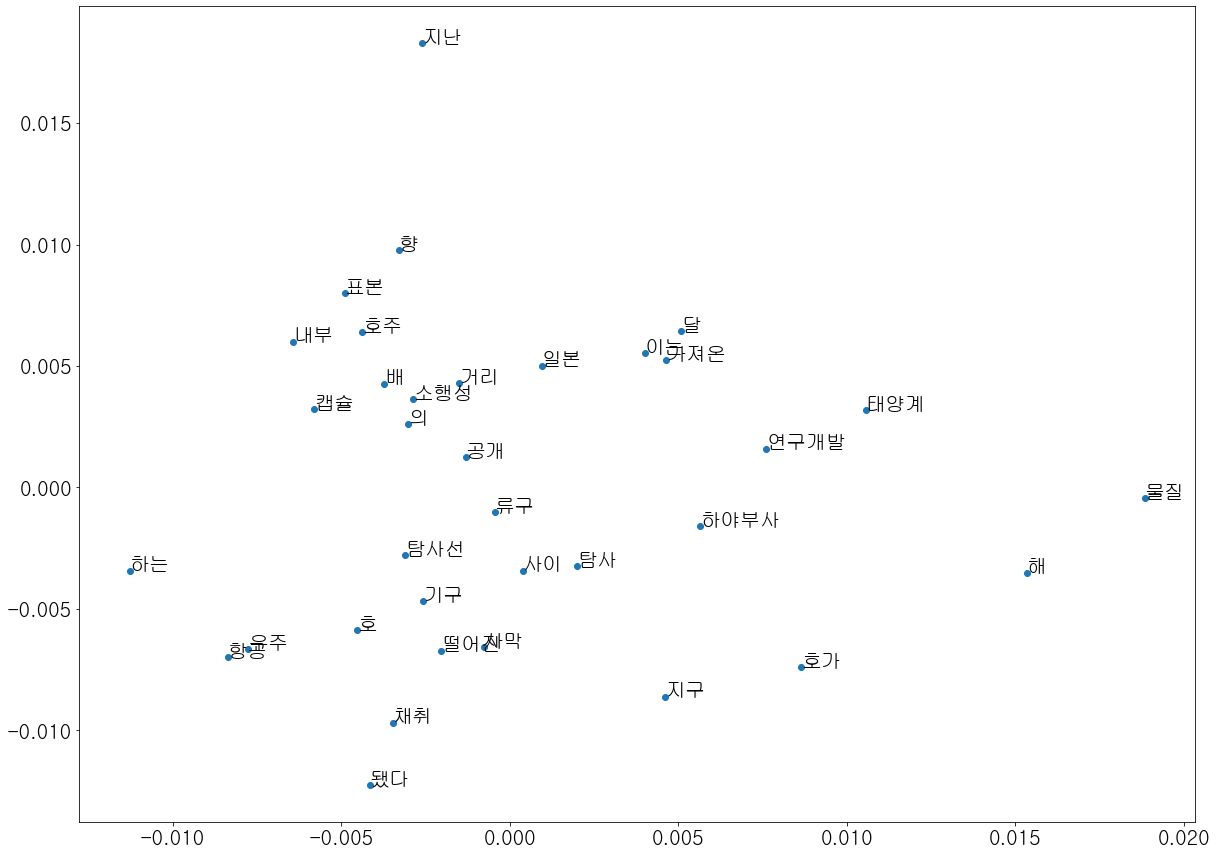

In [86]:
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (20,15)
plt.scatter(result_pos[:, 0], result_pos[:, 1])
words = list(model_pos.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result_pos[i, 0], result_pos[i, 1]))

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.show()